In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing

In [ ]:
# df = pd.read_csv("NSL_KDD_Train.csv")
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df_train = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


### Combine the train and test dataset

In [ ]:
df = pd.concat([df_train,df_test])

In [ ]:
print(f"Dimentions of complete dataframe : {df.shape}")

Dimentions of complete dataframe : (148517, 42)


In [ ]:
pd.options.display.max_rows = 999999
pd.options.display.max_columns = 500
pd.options.display.max_colwidth=1000

In [ ]:
df.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7  

In [ ]:
df.to_csv("NSL_KDD.csv")

### List of distinct labels


In [ ]:
label_unique = df["label"].unique()
protocol_type_unique = df["protocol_type"].unique()
service_unique = df["service"].unique()
flag_unique = df["flag"].unique()

In [ ]:
label_unique

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

### Network Traffic Attack Types in NSL KDD Dataset:

**Probes:**

* **neptune, ipsweep, portsweep, nmap, satan:** These attacks aim to gather information about a network and its vulnerabilities. They scan for active hosts, open ports, and running services.
* **teardrop, smurf, pod:** These are more complex probes that exploit specific network protocol vulnerabilities to crash or overwhelm devices.

**Denial-of-Service (DoS):**

* **warezclient, warezmaster, phf, land, loadmodule:** These attacks aim to disrupt services by flooding the target with excessive traffic, consuming resources, and rendering it unavailable.

**User to Root (U2R):**

* **guess_passwd, ftp_write, multihop, rootkit:** These attacks exploit vulnerabilities in applications or protocols to gain unauthorized access and escalate privileges to root (super user) level.

**Remote to Local (R2L):**

* **back, imap, buffer_overflow, perl:** These attacks target specific user accounts or services to gain unauthorized access from a remote location.




In [ ]:
protocol_type_unique

array(['tcp', 'udp', 'icmp'], dtype=object)

In [ ]:
service_unique

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [ ]:
flag_unique

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

### Convert categorical values into numerical values (one hot encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['protocol_type', 'service', 'flag']
df_onehot = pd.get_dummies(df, columns = categorical_columns)

In [ ]:
df_onehot.head(10)

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   
5         0          0          0     0               0       0    0   
6         0          0          0     0               0       0    0   
7         0          0          0     0               0       0    0   
8         0          0          0     0               0       0    0   
9         0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                  0          0                0           0             0   
1                  0          0                0           0             0   
2                  0          0                0           0             0   
3                  0          1                0           0             0   
4                  0          1                0           0             0   
5                  0          0                0           0             0   
6                  0          0                0           0             0   
7                  0          0                0           0             0   
8                  0          0                0           0             0   
9                  0          0                0           0             0   

   num_root  num_file_creations  num_shells  num_access_files  \
0         0                   0           0                 0   
1         0                   0           0                 0   
2         0                   0           0                 0   
3         0                   0           0                 0   
4         0                   0           0                 0   
5         0                   0           0                 0   
6         0                   0           0                 0   
7         0                   0           0                 0   
8         0                   0           0                 0   
9         0                   0           0                 0   

   num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  \
0                  0              0               0      2          2   
1                  0              0               0     13          1   
2                  0              0               0    123          6   
3                  0              0               0      5          5   
4                  0              0               0     30         32   
5                  0              0               0    121         19   
6                  0              0               0    166          9   
7                  0              0               0    117         16   
8                  0              0               0    270         23   
9                  0              0               0    133          8   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          0.0              0.0          0.0              0.0           1.00   
1          0.0              0.0          0.0              0.0           0.08   
2          1.0              1.0          0.0              0.0           0.05   
3          0.2              0.2          0.0              0.0           1.00   
4          0.0              0.0          0.0              0.0           1.00   
5          0.0              0.0          1.0              1.0           0.16   
6          1.0              1.0          0.0              0.0           0.05   
7          1.0              1.0          0.0              0.0           0.14   
8          1.0              1.0          0.0              0.0           0.09   
9          1.0              1.0

### Scaling numericals values

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_scale = ["duration","src_bytes", "dst_bytes", "urgent", "hot", "num_failed_logins","num_compromised","su_attempted", "num_root" ,"num_file_creations" ,"num_shells","num_access_files","count","srv_count","dst_host_count", "dst_host_srv_count"]

min_max_scaler = MinMaxScaler()
df_onehot[columns_to_scale] = min_max_scaler.fit_transform(df_onehot[columns_to_scale])

In [ ]:
df_preprocessed = df_onehot.copy()

In [ ]:
df_preprocessed.shape

(148517, 123)

In [ ]:
df_preprocessed.head(3)

duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0       0.0  3.558064e-07        0.0     0               0     0.0  0.0   
1       0.0  1.057999e-07        0.0     0               0     0.0  0.0   
2       0.0  0.000000e+00        0.0     0               0     0.0  0.0   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                0.0          0              0.0           0           0.0   
1                0.0          0              0.0           0           0.0   
2                0.0          0              0.0           0           0.0   

   num_root  num_file_creations  num_shells  num_access_files  \
0       0.0                 0.0         0.0               0.0   
1       0.0                 0.0         0.0               0.0   
2       0.0                 0.0         0.0               0.0   

   num_outbound_cmds  is_host_login  is_guest_login     count  srv_count  \
0                  0              0               0  0.003914   0.003914   
1                  0              0               0  0.025440   0.001957   
2                  0              0               0  0.240705   0.011742   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          0.0              0.0          0.0              0.0           1.00   
1          0.0              0.0          0.0              0.0           0.08   
2          1.0              1.0          0.0              0.0           0.05   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           0.00                 0.0        0.588235            0.098039   
1           0.15                 0.0        1.000000            0.003922   
2           0.07                 0.0        1.000000            0.101961   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                          0.0   
1                         0.88                          0.0   
2                         0.00                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  0.05   
1                   0.0                       0.0                  0.00   
2                   1.0                       1.0                  0.00   

   dst_host_srv_rerror_rate    label  protocol_type_icmp  protocol_type_tcp  \
0                       0.0   normal                   0                  1   
1                       0.0   normal                   0                  0   
2                       0.0  neptune                   0                  1   

   protocol_type_udp  service_IRC  service_X11  service_Z39_50  service_aol  \
0                  0            0            0               0            0   
1                  1            0            0               0            0   
2                  0            0            0               0            0   

   service_auth  service_bgp  service_courier  service_csnet_ns  service_ctf  \
0             0            0                0                 0            0   
1             0            0                0                 0            0   
2             0            0                0                 0            0   

   service_daytime  service_discard  service_domain  service_domain_u  \
0                0                0               0                 0   
1                0                0               0                 0   
2                0                0               0                 0   

   service_echo  service_eco_i  service_ecr_i  service_efs  service_exec  \
0             0              0              0            0             0   
1             0              0

In [ ]:
df_preprocessed_corr = df_preprocessed.copy()

In [ ]:
target = []
for i in df_preprocessed_corr["label"]:
  if i == "normal":
    target += [1]
  else :
    target += [0]
df_preprocessed_corr["label"] = np.array(target)

In [ ]:
df_preprocessed_corr.head(20)

duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  hot  \
0        0.0  3.558064e-07  0.000000e+00     0               0     0.0  0.0   
1        0.0  1.057999e-07  0.000000e+00     0               0     0.0  0.0   
2        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
3        0.0  1.681203e-07  6.223962e-06     0               0     0.0  0.0   
4        0.0  1.442067e-07  3.206260e-07     0               0     0.0  0.0   
5        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
6        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
7        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
8        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
9        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
10       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
11       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
12       0.0  2.079765e-07  1.718403e-06     0               0     0.0  0.0   
13       0.0  2.420353e-07  0.000000e+00     0               0     0.0  0.0   
14       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
15       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
16       0.0  2.173970e-07  1.052569e-05     0               0     0.0  0.0   
17       0.0  1.304382e-08  0.000000e+00     0               0     0.0  0.0   
18       0.0  1.688450e-07  4.702515e-07     0               0     0.0  0.0   
19       0.0  2.485572e-07  8.992796e-07     0               0     0.0  0.0   

    num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                 0.0          0              0.0           0           0.0   
1                 0.0          0              0.0           0           0.0   
2                 0.0          0              0.0           0           0.0   
3                 0.0          1              0.0           0           0.0   
4                 0.0          1              0.0           0           0.0   
5                 0.0          0              0.0           0           0.0   
6                 0.0          0              0.0           0           0.0   
7                 0.0          0              0.0           0           0.0   
8                 0.0          0              0.0           0           0.0   
9                 0.0          0              0.0           0           0.0   
10                0.0          0              0.0           0           0.0   
11                0.0          0              0.0           0           0.0   
12                0.0          1              0.0           0           0.0   
13                0.0          1              0.0           0           0.0   
14                0.0          0              0.0           0           0.0   
15                0.0          0              0.0           0           0.0   
16                0.0          1              0.0           0           0.0   
17                0.0          0              0.0           0           0.0   
18                0.0          1              0.0           0           0.0   
19                0.0          1              0.0           0           0.0   

    num_root  num_file_creations  num_shells  num_access_files  \
0        0.0                 0.0         0.0               0.0   
1        0.0                 0.0         0.0               0.0   
2        0.0                 0.0         0.0               0.0   
3        0.0                 0.0         0.0               0.0   
4        0.0                 0.0         0.0               0.0   
5        0.0                 0.0         0.0               0.0   
6        0.0                 0.0         0.0               0.0   
7        0.0                 0.0         0.0               0.0   
8        0.0                 0.0         0.0               0.0   
9        0.0            

### Finding importance of each feature

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_preprocessed_corr.corr()

plt.figure(figsize=(100, 100))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.title("Correlation Matrix", fontsize=16)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
correlation_matrix = df_preprocessed_corr.corr()
correlation_matrix

label_correlations = correlation_matrix['label'].sort_values(ascending=False)

print(f"Correlation with label (target attribute)\n: {label_correlations}")


Correlation with label (target attribute)
: label                          1.000000
flag_SF                        0.727673
same_srv_rate                  0.708911
dst_host_srv_count             0.692577
dst_host_same_srv_rate         0.667624
logged_in                      0.664117
service_http                   0.567600
service_domain_u               0.257288
protocol_type_udp              0.211381
service_smtp                   0.198205
srv_diff_host_rate             0.113183
service_ftp_data               0.079165
service_urp_i                  0.060940
flag_S1                        0.045455
num_access_files               0.035478
service_IRC                    0.033894
service_ntp_u                  0.033360
flag_S2                        0.023252
su_attempted                   0.021545
num_file_creations             0.017585
srv_count                      0.015006
service_X11                    0.014035
root_shell                     0.013468
num_root                       0.011

### Attributes with high positive correlation with label
* flag_SF                        = 0.727673
* same_srv_rate                  = 0.708911
* dst_host_srv_count             = 0.692577
* dst_host_same_srv_rate         = 0.667624
* logged_in                      = 0.664117
* service_http                   = 0.567600


### Attributes with high negative correlation with label
* count                       =   -0.524108
* flag_S0                     =   -0.585611
* srv_serror_rate             =   -0.586636
* serror_rate                 =   -0.588474
* dst_host_serror_rate        =   -0.589936
* dst_host_srv_serror_rate    =   -0.593690

#### num_outbound_cmds has a correlation value of NaN it may indicate the standard deviation is 0 ie the value remains constant for all data points. Hence its best to remove it from the dataframe

In [ ]:
df_preprocessed_corr['num_outbound_cmds'].unique()

array([0])

### Feature importance

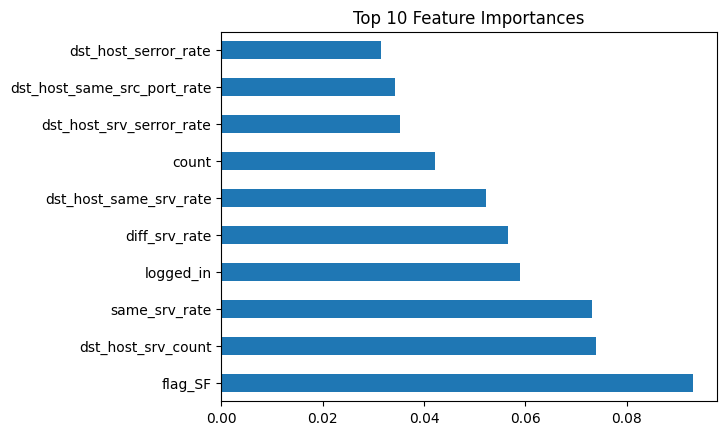

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_preprocessed_corr.drop('label', axis=1)
y = df_preprocessed_corr['label']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

### Normal and Anomalous traffic data after preprocessing

In [ ]:
normal_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]=="normal"]
anomalous_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]!="normal"]

In [ ]:
normal_traffic_preprocessed.head(10)

duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  hot  \
0    0.00000  3.558064e-07  0.000000e+00     0               0     0.0  0.0   
1    0.00000  1.057999e-07  0.000000e+00     0               0     0.0  0.0   
3    0.00000  1.681203e-07  6.223962e-06     0               0     0.0  0.0   
4    0.00000  1.442067e-07  3.206260e-07     0               0     0.0  0.0   
12   0.00000  2.079765e-07  1.718403e-06     0               0     0.0  0.0   
16   0.00000  2.173970e-07  1.052569e-05     0               0     0.0  0.0   
18   0.00000  1.688450e-07  4.702515e-07     0               0     0.0  0.0   
19   0.00000  2.485572e-07  8.992796e-07     0               0     0.0  0.0   
22   0.00000  1.833381e-07  9.088221e-06     0               0     0.0  0.0   
23   0.09715  1.065245e-07  8.015650e-08     0               0     0.0  0.0   

    num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                 0.0          0              0.0           0           0.0   
1                 0.0          0              0.0           0           0.0   
3                 0.0          1              0.0           0           0.0   
4                 0.0          1              0.0           0           0.0   
12                0.0          1              0.0           0           0.0   
16                0.0          1              0.0           0           0.0   
18                0.0          1              0.0           0           0.0   
19                0.0          1              0.0           0           0.0   
22                0.0          1              0.0           0           0.0   
23                0.0          0              0.0           0           0.0   

    num_root  num_file_creations  num_shells  num_access_files  \
0        0.0                 0.0         0.0               0.0   
1        0.0                 0.0         0.0               0.0   
3        0.0                 0.0         0.0               0.0   
4        0.0                 0.0         0.0               0.0   
12       0.0                 0.0         0.0               0.0   
16       0.0                 0.0         0.0               0.0   
18       0.0                 0.0         0.0               0.0   
19       0.0                 0.0         0.0               0.0   
22       0.0                 0.0         0.0               0.0   
23       0.0                 0.0         0.0               0.0   

    num_outbound_cmds  is_host_login  is_guest_login     count  srv_count  \
0                   0              0               0  0.003914   0.003914   
1                   0              0               0  0.025440   0.001957   
3                   0              0               0  0.009785   0.009785   
4                   0              0               0  0.058708   0.062622   
12                  0              0               0  0.005871   0.013699   
16                  0              0               0  0.015656   0.017613   
18                  0              0               0  0.005871   0.005871   
19                  0              0               0  0.017613   0.019569   
22                  0              0               0  0.015656   0.019569   
23                  0              0               0  0.001957   0.001957   

    serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0           0.0             0.00          0.0              0.0           1.00   
1           0.0             0.00          0.0              0.0           0.08   
3           0.2             0.20          0.0              0.0           1.00   
4           0.0             0.00          0.0              0.0           1.00   
12          0.0             0.00          0.0              0.0           1.00   
16          0.0             0.11          0.0              0.0           1.00   
18          0.0             0.00          0.0              0.0           1.00   
19          0.0             0.00         

In [ ]:
normal_traffic_preprocessed.shape

(77054, 123)

In [ ]:
preprocessed_columns = normal_traffic_preprocessed.columns

In [ ]:
anomalous_traffic_preprocessed.head(10)

duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
2        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
5        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
6        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
7        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
8        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
9        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
10       0.0  0.000000e+00        0.0     0               0     0.0  0.0   
11       0.0  0.000000e+00        0.0     0               0     0.0  0.0   
13       0.0  2.420353e-07        0.0     0               0     0.0  0.0   
14       0.0  0.000000e+00        0.0     0               0     0.0  0.0   

    num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
2                 0.0          0              0.0           0           0.0   
5                 0.0          0              0.0           0           0.0   
6                 0.0          0              0.0           0           0.0   
7                 0.0          0              0.0           0           0.0   
8                 0.0          0              0.0           0           0.0   
9                 0.0          0              0.0           0           0.0   
10                0.0          0              0.0           0           0.0   
11                0.0          0              0.0           0           0.0   
13                0.0          1              0.0           0           0.0   
14                0.0          0              0.0           0           0.0   

    num_root  num_file_creations  num_shells  num_access_files  \
2        0.0                 0.0         0.0               0.0   
5        0.0                 0.0         0.0               0.0   
6        0.0                 0.0         0.0               0.0   
7        0.0                 0.0         0.0               0.0   
8        0.0                 0.0         0.0               0.0   
9        0.0                 0.0         0.0               0.0   
10       0.0                 0.0         0.0               0.0   
11       0.0                 0.0         0.0               0.0   
13       0.0                 0.0         0.0               0.0   
14       0.0                 0.0         0.0               0.0   

    num_outbound_cmds  is_host_login  is_guest_login     count  srv_count  \
2                   0              0               0  0.240705   0.011742   
5                   0              0               0  0.236791   0.037182   
6                   0              0               0  0.324853   0.017613   
7                   0              0               0  0.228963   0.031311   
8                   0              0               0  0.528376   0.045010   
9                   0              0               0  0.260274   0.015656   
10                  0              0               0  0.401174   0.023483   
11                  0              0               0  0.389432   0.005871   
13                  0              0               0  0.003914   0.003914   
14                  0              0               0  0.455969   0.001957   

    serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
2           1.0              1.0          0.0              0.0           0.05   
5           0.0              0.0          1.0              1.0           0.16   
6           1.0              1.0          0.0              0.0           0.05   
7           1.0              1.0          0.0              0.0           0.14   
8           1.0              1.0          0.0              0.0           0.09   
9           1.0              1.0          0.0              0.0           0.06   
10          0.0              0.0          1.0              1.0           0.06   
11          1.0              1.0          0.0              0.0           0

In [ ]:
anomalous_traffic_preprocessed.shape

(71463, 123)

# Basic AutoEncoder model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder(input_dim, encoding_dim):
  input_layer = Input(shape=(input_dim,))
  encoded = Dense(encoding_dim, activation="relu")(input_layer)
  decoded = Dense(input_dim, activation="sigmoid")(encoded)
  autoencoder = Model(inputs=input_layer,outputs=decoded)

  autoencoder.compile(optimizer="adam",loss="mean_squared_error")

  return autoencoder

In [ ]:
normal_traffic_arr = normal_traffic_preprocessed.to_numpy()
anomalous_traffic_arr = anomalous_traffic_preprocessed.to_numpy()

In [ ]:
train_arr = normal_traffic_arr[:-10000]
test_arr = np.concatenate((normal_traffic_arr[-10000:], anomalous_traffic_arr))

In [ ]:
train_df = pd.DataFrame(train_arr)
test_df = pd.DataFrame(test_arr)
train_df.columns = preprocessed_columns
test_df.columns = preprocessed_columns

In [ ]:
x_train = train_df.drop("label",axis=1)

In [ ]:
x_train.head(5).shape

(5, 122)

In [ ]:
x_train = np.array(x_train).astype("float32")

In [ ]:

# input_dim = 122
# encoding_dim = 32
# autoencoder = create_autoencoder(input_dim, encoding_dim)
# autoencoder.fit(x_train,x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

# ae_op = autoencoder.predict(x_train)
# reconstruction_loss = autoencoder.evaluate(ae_op ,x_train)
# print(reconstruction_loss)

In [ ]:
# from keras.models import save_model

# autoencoder.save('autoencoder_model_00.h5')

In [ ]:
from keras.models import load_model

# Load the model from the file
autoencoder = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder_model_00.h5')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense (Dense)               (None, 32)                3936      
                                                                 
 dense_1 (Dense)             (None, 122)               4026      
                                                                 
Total params: 7962 (31.10 KB)
Trainable params: 7962 (31.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


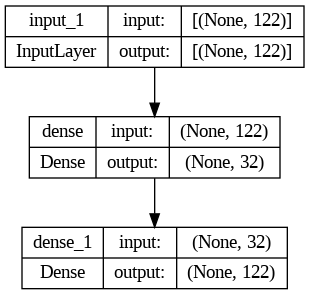

In [ ]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:
normal_train_output = autoencoder.predict(x_train)

2096/2096 [==============================] - 4s 2ms/step


In [ ]:
normal_train_output

array([[4.5423649e-04, 7.9961406e-05, 8.1132726e-05, ..., 6.4352309e-05,
        9.9861515e-01, 1.0541982e-04],
       [4.8959825e-02, 3.3966400e-05, 4.6597994e-05, ..., 8.4042331e-06,
        9.9999171e-01, 3.3665623e-05],
       [1.9724690e-04, 3.0003759e-05, 1.4060612e-05, ..., 2.9447750e-04,
        9.9733818e-01, 1.7533097e-05],
       ...,
       [3.4489200e-04, 2.5207506e-05, 1.7337332e-05, ..., 1.4891315e-04,
        9.9952888e-01, 2.0206029e-05],
       [8.9775000e-05, 4.9744813e-06, 9.6414551e-06, ..., 1.6102262e-04,
        6.1911844e-05, 4.8476613e-05],
       [5.6668936e-04, 5.8227010e-06, 2.5427007e-06, ..., 2.2007727e-08,
        1.0000000e+00, 6.7412266e-06]], dtype=float32)

### Calculating reconstruction loss of normal traffic data from train dataset

In [ ]:
mse_normal_train = np.mean(np.power(x_train - normal_train_output, 2), axis=1)
np.average(mse_normal_train)

8.441338e-05

### Testing the model

In [ ]:
normal_test = test_df.loc[test_df["label"] == "normal"]
anomalous_test = test_df.loc[test_df["label"] != "normal"]

In [ ]:
normal_test.shape

(10000, 123)

In [ ]:
anomalous_test.shape

(71463, 123)

In [ ]:
normal_test = normal_test.drop("label",axis=1)
anomalous_test = anomalous_test.drop("label",axis=1)

In [ ]:
normal_test = np.array(normal_test).astype("float32")
anomalous_test = np.array(anomalous_test).astype("float32")

### Evaluating model on normal data from test dataset

In [ ]:
normal_test_op = autoencoder.predict(normal_test)

313/313 [==============================] - 0s 1ms/step


### Calculating reconstruction loss of normal traffic data from test dataset

In [ ]:
mse_normal_test = np.mean(np.power(normal_test - normal_test_op, 2), axis=1)
np.average(mse_normal_test)

0.000685137

In [ ]:
mse_normal_test

array([8.9991408e-05, 1.7103237e-04, 3.5363828e-05, ..., 4.9437724e-05,
       6.9091082e-05, 7.9542129e-05], dtype=float32)

In [ ]:
threshold = np.mean(mse_normal_train) + np.std(mse_normal_train)
print("Threshold: ", threshold)

Threshold:  0.00033487042


### Find how many normal traffic data from test dataset is classified as normal

In [ ]:
normal_count=0
non_normal_count=0
for i in mse_normal_test:
  if i < threshold:
    normal_count+=1
  else:
    non_normal_count+=1
print(f"normal count : {normal_count}")
print(f"non normal count : {non_normal_count}")

normal count : 9124
non normal count : 876


### Calculating reconstruction loss of anomalous traffic data from test dataset

In [ ]:
anomalous_test_op = autoencoder.predict(anomalous_test)

2234/2234 [==============================] - 3s 1ms/step


In [ ]:
mse_anomalous_test = np.mean(np.power(anomalous_test - anomalous_test_op, 2), axis=1)
np.average(mse_anomalous_test)

# loss1 = tf.keras.losses.mae(anomalous_test_op,np.array(anomalous_test).astype("float32"))
# np.max(loss1)

0.008904642

### Find how many anomalous traffic data from test dataset is classified as normal

In [ ]:
anomalous_count=0
non_anomalous_count=0
for i in mse_anomalous_test:
  if i > threshold:
    anomalous_count+=1
  else:
    non_anomalous_count+=1
print(f"anomalous count : {anomalous_count}")
print(f"non anomalous count : {non_anomalous_count}")

anomalous count : 64300
non anomalous count : 7163


### Find how many normal traffic data from train dataset is classified as normal

In [ ]:
normal_train_count=0
non_normal_train_count=0
for i in mse_normal_train:
  if i < threshold:
    normal_train_count+=1
  else:
    non_normal_train_count+=1
print(f"normal train count : {normal_train_count}")
print(f"non normal train count : {non_normal_train_count}")

normal train count : 65959
non normal train count : 1095



* TP = 64300
* FN = 7163
* TN = 9124
* FP = 876

### Verifying evalutation metrics using code

In [ ]:
target_test = []
for i in test_df["label"]:
  if i == "normal":
    target_test += [0]
  else:
    target_test += [1]

In [ ]:
x_test = test_df.drop("label",axis=1)

In [ ]:
x_test = np.array(x_test).astype("float32")

In [ ]:
x_test_output = autoencoder.predict(x_test)

2546/2546 [==============================] - 4s 2ms/step


In [ ]:
mse_test = np.mean(np.power(x_test - x_test_output, 2), axis=1)
np.average(mse_test)

0.007895657

In [ ]:
test_pred = []
for i in mse_test:
  if i > threshold:
    test_pred += [1]
  else:
    test_pred += [0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(target_test, test_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(target_test, test_pred))

Confusion Matrix:
[[ 9124   876]
 [ 7163 64300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.91      0.69     10000
           1       0.99      0.90      0.94     71463

    accuracy                           0.90     81463
   macro avg       0.77      0.91      0.82     81463
weighted avg       0.93      0.90      0.91     81463



<Axes: >

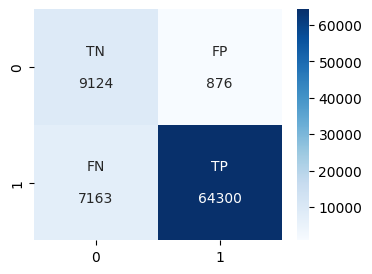

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
group_names = ["TN","FP","FN","TP"]
group_counts = [f"{value:0.0f}" for value in cm.flatten()]
# group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

## clustering